In [62]:
import tensorflow as tf
import pandas as pd
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [12]:
data_dir ="C:\\Users\\USER\\Documents\\ML\\NLP\\disaster\\src\\disaster-tweet\\"
train_data_dir = data_dir + "train.csv"
test_data_dir = data_dir + "test.csv"

In [13]:
train_data = pd.read_csv(train_data_dir )
test_data = pd.read_csv(test_data_dir)                         

train_data.head()


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [15]:
train_data["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [16]:
train_text = train_data["text"]
train_label = train_data["target"]
train_location = train_data["location"]
train_keyword = train_data["keyword"]

test_text = test_data["text"]
test_location = test_data["location"]
test_keyword = test_data["keyword"]

In [17]:
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [18]:
import random

random.choices(train_text, k =10)

['@noah_anyname The utopian impulse inevitably ends in gulags and mass murder.',
 'Mere sight of a gun makes police \x89ÛÒ and public \x89ÛÒ more aggressive experts say http://t.co/N4NEUIyt2k',
 'Firefighting consumes Forest Service budget sparks political clash: Forest Service report cites increasing cost of\x89Û_ http://t.co/lSWsitnkuk',
 'Rescued Med migrants arrive in Sicily http://t.co/Z8xIqNgulc',
 'The U.S. bombed Hiroshima 70 years ago today. A look at how war has changed since: http://t.co/UQnj6nk9y3 http://t.co/QLnnMxzFqK',
 '&lt;meltdown of proportions commences I manage to calm myself long enough to turn the waters to hot and wait for the steam to cloud my vision-',
 "@oooureli @Abu_Baraa1 You mean like the tolerance you showed when sharing 'democracy' with the Iraqis? Wait you mutilated and bombed them.",
 'Wtf Thomas Edison after making the lightbulb used to electrocute animals to make everyone think Teslas power was unsafe???? wank',
 '@thetimepast @saalon I have childho

In [27]:
plt_list = []
leng = 0
for text in train_text:
    plt_list.append(len(text))
    leng =leng + len(text)

leng/len(train_text)

101.03743596479706

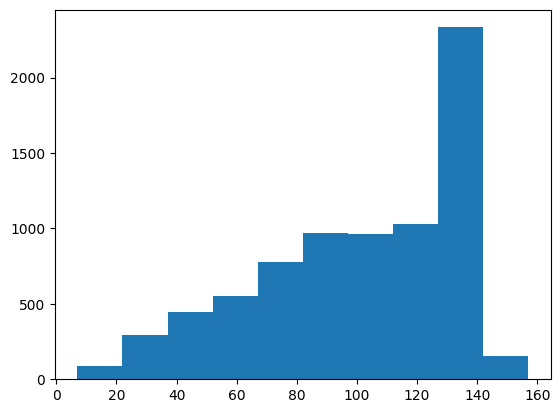

In [28]:
plt.hist(plt_list);

In [20]:
random.choices(train_location , k = 10)

['Indonesia',
 nan,
 nan,
 nan,
 '???? ???????',
 nan,
 nan,
 'Ile-Ife,Osun state, Nigeria',
 'Waterford MI',
 nan]

In [21]:
random.choices(train_keyword, k = 10)

['danger',
 'sinkhole',
 'buildings%20on%20fire',
 nan,
 'ablaze',
 'sinking',
 'fire%20truck',
 'upheaval',
 'radiation%20emergency',
 'twister']

In [31]:
max_vocab = 10000
output_length = 150

text_vector = layers.TextVectorization(max_tokens = max_vocab , output_sequence_length=output_length )

text_embed = layers.Embedding(max_vocab, 128, mask_zero=True)

text_vector.adapt(train_text)

In [38]:
train_sentences, val_sentences , train_target , val_target = train_test_split(
                                                                train_text,
                                                                train_label,
                                                                test_size = 0.3,
                                                                random_state = 42)

In [91]:
# train_target = tf.cast(train_target, tf.float64)
# train_target = np.expand_dims(train_target , axis =1)

# val_target = tf.cast(val_target, tf.float64)
# val_target = np.expand_dims(val_target , axis =1)

In [94]:
train_dataset_0 = tf.data.Dataset.from_tensor_slices((train_sentences, train_target))
val_dataset_0 = tf.data.Dataset.from_tensor_slices((val_sentences, val_target))

train_dataset_0 = train_dataset_0.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset_0 = val_dataset_0.batch(32).prefetch(tf.data.AUTOTUNE)

In [95]:
train_dataset_0

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float64, name=None))>

In [96]:
train_dataset_0.element_spec

(TensorSpec(shape=(None,), dtype=tf.string, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float64, name=None))

In [97]:
inputs = layers.Input(shape = (1,) , dtype = tf.string)

x = text_vector(inputs)
x = text_embed(x)

x = layers.Conv1D(64, 2, activation = "tanh")(x)


x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(64 , activation = "tanh")(x)
x = layers.Dense(64, activation = "tanh")(x)

outputs = layers.Dense(1, activation = "sigmoid")(x)

model_0 = tf.keras.Model(inputs , outputs)

model_0.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 150)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 150, 128)          1280000   
                                                                 
 conv1d_12 (Conv1D)          (None, 149, 64)           16448     
                                                                 
 global_average_pooling1d_10  (None, 64)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_28 (Dense)            (None, 64)                4160

In [99]:
model_0.compile(loss = "binary_crossentropy",
               optimizer = "adam",
               metrics = ["accuracy"])

model_0.fit(train_dataset_0, 
           epochs = 10 ,
           validation_data=val_dataset_0)

Epoch 1/10
167/167 [==============================] - 8s 40ms/step - loss: 0.0739 - accuracy: 0.9743 - val_loss: 0.9011 - val_accuracy: 0.7706
Epoch 2/10
167/167 [==============================] - 6s 37ms/step - loss: 0.0646 - accuracy: 0.9786 - val_loss: 0.9663 - val_accuracy: 0.7666
Epoch 3/10
167/167 [==============================] - 6s 38ms/step - loss: 0.0604 - accuracy: 0.9773 - val_loss: 0.9941 - val_accuracy: 0.7631
Epoch 4/10
167/167 [==============================] - 6s 37ms/step - loss: 0.0602 - accuracy: 0.9782 - val_loss: 1.0052 - val_accuracy: 0.7439
Epoch 5/10
167/167 [==============================] - 6s 38ms/step - loss: 0.0649 - accuracy: 0.9765 - val_loss: 1.0288 - val_accuracy: 0.7272
Epoch 6/10
167/167 [==============================] - 7s 39ms/step - loss: 0.0767 - accuracy: 0.9732 - val_loss: 1.0411 - val_accuracy: 0.7207
Epoch 7/10
167/167 [==============================] - 6s 38ms/step - loss: 0.0910 - accuracy: 0.9643 - val_loss: 1.0617 - val_accuracy: 0.6808

In [59]:
train_target

1186    0
4071    1
5461    1
5787    1
7445    0
       ..
5226    0
5390    0
860     0
7603    1
7270    1
Name: target, Length: 5329, dtype: int64